In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
plt.ion()

In [2]:
df = pd.read_csv("mdLog.csv")

In [65]:
df.head(10)

,updateCount,lastprice,volume,bidsize,bid,ask,asksize,spread,marketsize,mid,curvolume
0,1,26.78,303,455,26.77,26.79,1,0.02,228.0,26.780,0
1,2,26.78,303,455,26.77,26.79,1,0.02,228.0,26.780,0
2,3,26.77,361,518,26.77,26.78,1,0.01,259.5,26.775,58
3,4,26.79,374,42,26.78,26.79,44,0.01,43.0,26.785,13
4,5,26.79,413,163,26.77,26.80,2,0.03,82.5,26.785,39
5,6,26.78,512,174,26.77,26.79,28,0.02,101.0,26.780,99
6,7,26.78,588,386,26.77,26.78,10,0.01,198.0,26.775,76
7,8,26.78,588,385,26.77,26.79,13,0.02,199.0,26.780,0
8,9,26.78,589,7,26.78,26.79,13,0.01,10.0,26.785,1
9,10,26.78,645,84,26.78,26.80,18,0.02,51.0,26.790,56


In [4]:
df.shape

(50234, 7)

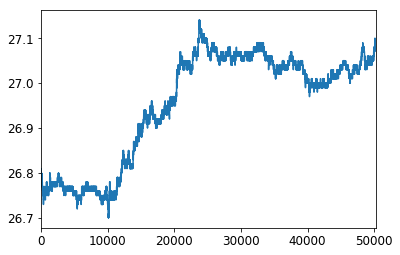

In [63]:
df['lastprice'].plot()

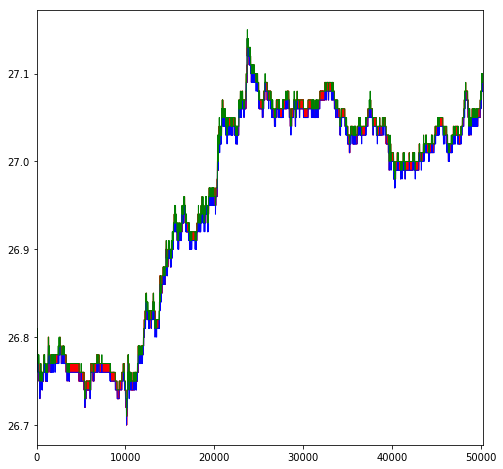

In [6]:
plt.figure(figsize=(8,8))
ax = df['lastprice'].plot(color='r',linewidth=1)
ax = df['bid'].plot(color='b',linewidth=1)
ax = df['ask'].plot(color='g',linewidth=1)

In [7]:
df['spread'] = (df['ask'] - df['bid']).apply(lambda x:round(x,4))

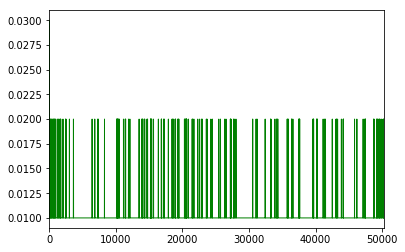

In [8]:
df['spread'].plot(color='g',linewidth=1)

In [10]:
df['spread'].value_counts()

0.01    49584
0.02      649
0.03        1
Name: spread, dtype: int64

In [ ]:
# Question 1

In [11]:
print("proportion of widen",(df['spread']>df['spread'].shift(1)).sum()/len(df['spread']))
print("proportion of tighten",(df['spread']<df['spread'].shift(1)).sum()/len(df['spread']))
print("proportion of equal",(df['spread']==df['spread'].shift(1)).sum()/len(df['spread']))

proportion of widen 0.004638292789743998
proportion of tighten 0.004678106461758968
proportion of equal 0.9906636939124895


In [54]:
# widen index
index = df['spread']>df['spread'].shift(1)
print("times when bid-ask spread widen:",index.sum())

times when bid-ask spread widen: 233


In [55]:
index2 = (df['bid'] < df['bid'].shift(1))&(df['ask'] > df['ask'].shift(1))&index
print("out of them, proportion that bid decreased and ask increased:",index2.sum()/index.sum())

out of them, proportion that bid decreased and ask increased: 0.004291845493562232


In [56]:
index3 = ((df['bid'] < df['bid'].shift(1))^(df['ask'] > df['ask'].shift(1)))&index
print("out of them, proportion that, bid decreased xor ask increased:",index3.sum()/index.sum())

out of them, proportion that, bid decreased xor ask increased: 0.9957081545064378


In [21]:
# tighten index
index_tight = df['spread']<df['spread'].shift(1)
print("times when bid-ask spread tighten:",index_tight.sum())

times when bid-ask spread tighten: 235


In [22]:
df['marketsize'] = (df['asksize']+df['bidsize'])/2

In [30]:
values = df['marketsize'].values

In [34]:
t = []
for i in range(len(values)):
    if i>=5 and i+5<=len(values):
        t.append(values[i-5:i+5].mean())
    else:
        t.append(values[i])
t = np.array(t) 

Text(0.5,1,'distribution of market size')

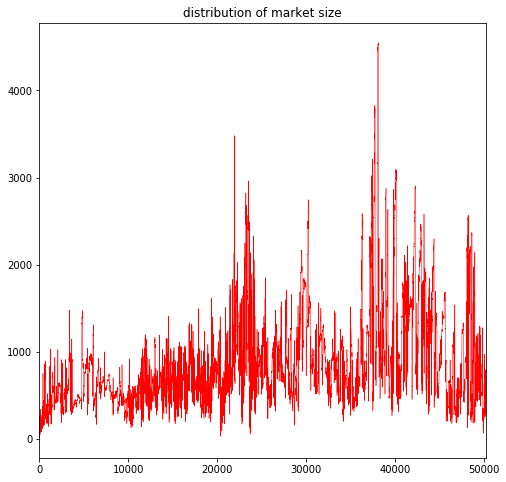

In [39]:
plt.figure(figsize=(8,8))
ax = df['marketsize'].plot(color='r',linewidth=0.5)
# plt.plot(df['updateCount'],t,'b',linewidth=0.5)
ax.set_title("distribution of market size")

# Question 2

In [27]:
df['mid'] = (df['ask']+df['bid'])/2

Text(0.5,1,'distribution of mid price')

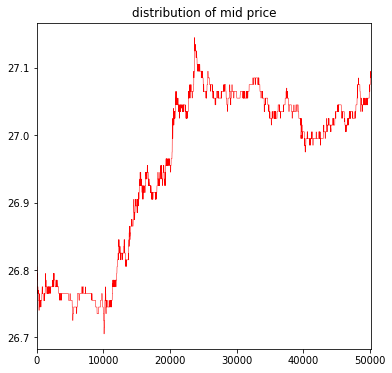

In [41]:
plt.figure(figsize=(6,6))
ax = df['mid'].plot(color='r',linewidth=0.5)
ax.set_title("distribution of mid price")

In [45]:
#mid price开始变大，但是spread不变
index = (df['mid']>df['mid'].shift(1,fill_value=float("inf")))&(df['spread']==df['spread'].shift(1))
index2 = index & ~index.shift(1,fill_value=True)

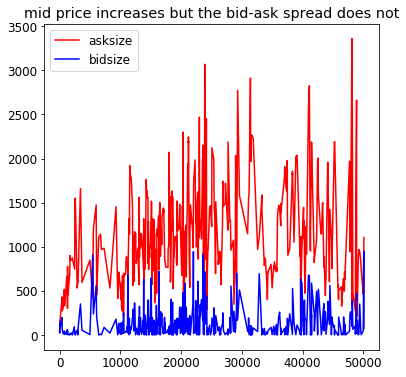

In [50]:
# 当价格开始变大，但是价差不变的情况下，买的人比卖的人多,买涨
index = (df['mid']>df['mid'].shift(1,fill_value=0))&(df['spread']==df['spread'].shift(1))#mid price开始变大
plt.figure(figsize=(6,6))
font = {'family' : 'sans-serif',
        'size'   : 12}
plt.rc('font', **font)
plt.plot(df[index].index,df[index]['asksize'],'r',label='asksize')
plt.plot(df[index].index,df[index]['bidsize'],'b',label='bidsize')
plt.title("mid price increases but the bid-ask spread does not")
plt.legend(loc=0)

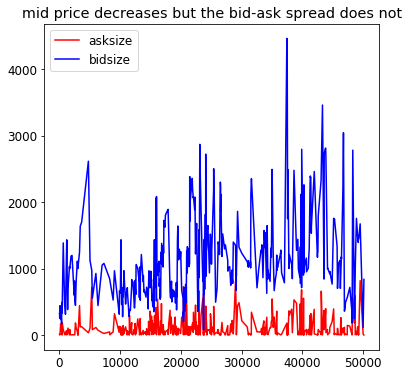

In [51]:
# 当价格开始变小，但是价差不变的情况下，卖的人比买的人多，卖跌
index = (df['mid']<df['mid'].shift(1,fill_value=0))&(df['spread']==df['spread'].shift(1))#mid price开始变小
plt.figure(figsize=(6,6))
font = {'family' : 'sans-serif',
        'size'   : 12}
plt.rc('font', **font)
plt.plot(df[index].index,df[index]['asksize'],'r')
plt.plot(df[index].index,df[index]['bidsize'],'b')
plt.title("mid price decreases but the bid-ask spread does not")
plt.legend(loc=0)

# Q2 结论
#### 在bid-ask spread不变的情况下
- 当mid price增加的时候，买的量比卖的量多，原因为买涨；
- 相反，当mid price减小的时候，卖的量比买的量多，原因为卖跌

# Q3
关于volume分配，可以有以下几种考量
1. 所有volume都是在last price上交易
2. 不考虑last price，根据bidsize和asksize，在bid与ask上进行按比例分配

考虑到价差较小，目前先按照最简单的考虑，全部在last price上交易，如果后续模型需要，再更新分配策略

In [59]:
# 当前交易了的量
df['curvolume'] = df['volume'] - df['volume'].shift(1,fill_value=0)
df.loc[0,"curvolume"] = 0

In [73]:
# 不同价格的change没有意义，故暂时删除
df['bidchange'] = df['bidsize']-df['bidsize'].shift(1,fill_value=0)+df['curvolume']
df['askchange'] = df['asksize']-df['asksize'].shift(1,fill_value=0)+df['curvolume']
df.loc[0,"bidchange"] = 0
df.loc[0,"askchange"] = 0

df.drop(["bidchange","askchange"],axis=1,inplace=True)

In [74]:
df.head(12)

,updateCount,lastprice,volume,bidsize,bid,ask,asksize,spread,marketsize,mid,curvolume
0,1,26.78,303,455,26.77,26.79,1,0.02,228.0,26.780,0
1,2,26.78,303,455,26.77,26.79,1,0.02,228.0,26.780,0
2,3,26.77,361,518,26.77,26.78,1,0.01,259.5,26.775,58
3,4,26.79,374,42,26.78,26.79,44,0.01,43.0,26.785,13
4,5,26.79,413,163,26.77,26.80,2,0.03,82.5,26.785,39
5,6,26.78,512,174,26.77,26.79,28,0.02,101.0,26.780,99
6,7,26.78,588,386,26.77,26.78,10,0.01,198.0,26.775,76
7,8,26.78,588,385,26.77,26.79,13,0.02,199.0,26.780,0
8,9,26.78,589,7,26.78,26.79,13,0.01,10.0,26.785,1
9,10,26.78,645,84,26.78,26.80,18,0.02,51.0,26.790,56


# Q4
- sizeDeltaAtBid表示的是价格不变的时候，该价格所挂的bid order改变的数量
- sizeDeltaAtAsk表示的是价格不变的时候，该价格所挂的ask order改变的数量

In [75]:
df["sizeDeltaAtBid"] = df['bidsize']-df['bidsize'].shift(1,fill_value=0) + (df['volume']-df['volume'].shift(1,fill_value=0))
df.loc[df['bid']!=df['bid'].shift(1),"sizeDeltaAtBid"]=np.nan

df["sizeDeltaAtAsk"] = df['asksize']-df['asksize'].shift(1,fill_value=0) + (df['volume']-df['volume'].shift(1,fill_value=0))
df.loc[df['ask']!=df['ask'].shift(1),"sizeDeltaAtAsk"]=np.nan


In [119]:
df.head()

,updateCount,lastprice,volume,bidsize,bid,ask,asksize,spread,marketsize,mid,curvolume,sizeDeltaAtBid,sizeDeltaAtAsk
0,1,26.78,303,455,26.77,26.79,1,0.02,228.0,26.780,0,NaN,NaN
1,2,26.78,303,455,26.77,26.79,1,0.02,228.0,26.780,0,0.0,0.0
2,3,26.77,361,518,26.77,26.78,1,0.01,259.5,26.775,58,121.0,NaN
3,4,26.79,374,42,26.78,26.79,44,0.01,43.0,26.785,13,NaN,NaN
4,5,26.79,413,163,26.77,26.80,2,0.03,82.5,26.785,39,NaN,NaN


Text(0.5,1,'distribution of sizeDeltaAtAsk')

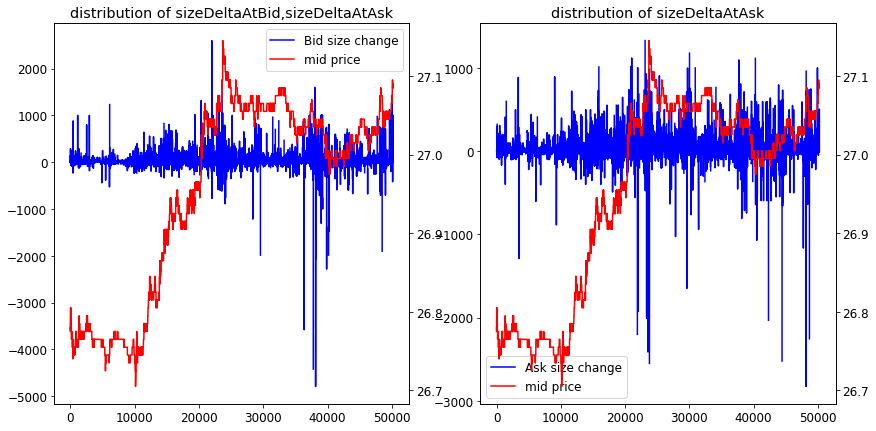

In [95]:
fig,(ax,ax2) = plt.subplots(1,2,figsize=(14,7))
font = {'family' : 'sans-serif',
        'size'   : 12}
plt.rc('font', **font)
lns1 = ax.plot(df.index,df['sizeDeltaAtBid'],'b',label='Bid size change')
# plt.plot(df.index,df['sizeDeltaAtAsk'],'r',alpha=0.5,label='Asksize')
ax.set_title("distribution of sizeDeltaAtBid")

ax_twin = ax.twinx()
lns2 = ax_twin.plot(df.index,df['mid'],'r',label='mid price')

lns = lns1+lns2
labs = [l.get_label() for l in lns]
ax.legend(lns, labs, loc=0)

##############
lns1 = ax2.plot(df.index,df['sizeDeltaAtAsk'],'b',label='Ask size change')
# plt.plot(df.index,df['sizeDeltaAtAsk'],'r',alpha=0.5,label='Asksize')
# plt.title("distribution of sizeDeltaAtBid,sizeDeltaAtAsk")

ax_twin = ax2.twinx()
lns2 = ax_twin.plot(df.index,df['mid'],'r',label='mid price')

lns = lns1+lns2
labs = [l.get_label() for l in lns]
ax2.legend(lns, labs, loc=0)
ax2.set_title("distribution of sizeDeltaAtAsk")

##  Q4分析，为便于观察，只关注一边的情况，左边图为bid的情况，也就是买方，右边为ask情况，也就是卖方，以上图可以明显看出
1. 在价格下跌的过程中，尤其是时间点40000左右的部分，价格下跌，买方订单急剧减少
2. 在价格上涨的过程中，尤其是时间点22000左右的部分，价格上涨，卖方订单急剧减少

Text(0.5,1,'distribution of sizeDeltaAtAsk for size decrease')

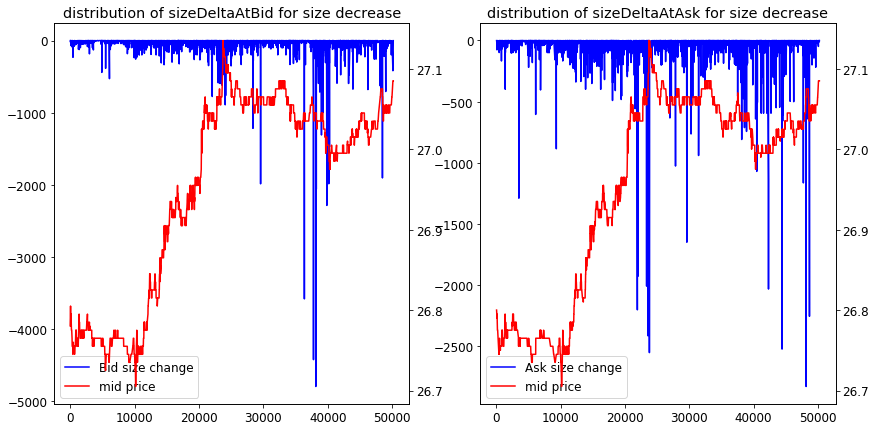

In [115]:

# index = df['mid']==(df['mid'].shift(1,fill_value=0))
index = df['sizeDeltaAtBid']<0
fig,(ax,ax2) = plt.subplots(1,2,figsize=(14,7))
font = {'family' : 'sans-serif',
        'size'   : 12}
plt.rc('font', **font)
lns1 = ax.plot(df[index].index,df[index]['sizeDeltaAtBid'],'b',label='Bid size change')
# plt.plot(df.index,df['sizeDeltaAtAsk'],'r',alpha=0.5,label='Asksize')
ax.set_title("distribution of sizeDeltaAtBid for size decrease")

ax_twin = ax.twinx()
lns2 = ax_twin.plot(df[index].index,df[index]['mid'],'r',label='mid price')

lns = lns1+lns2
labs = [l.get_label() for l in lns]
ax.legend(lns, labs, loc=0)

##############

index = df['sizeDeltaAtAsk']<0
lns1 = ax2.plot(df[index].index,df[index]['sizeDeltaAtAsk'],'b',label='Ask size change')
# plt.plot(df.index,df['sizeDeltaAtAsk'],'r',alpha=0.5,label='Asksize')
# plt.title("distribution of sizeDeltaAtBid,sizeDeltaAtAsk")

ax_twin = ax2.twinx()
lns2 = ax_twin.plot(df[index].index,df[index]['mid'],'r',label='mid price')

lns = lns1+lns2
labs = [l.get_label() for l in lns]
ax2.legend(lns, labs, loc=0)
ax2.set_title("distribution of sizeDeltaAtAsk for size decrease")


# Question 5
Now we will focus on the aggressive side. Assume the size on the aggressive side we see immediately after a price change is from a single limit order, which we call the top order.

个人觉得题目意思在这里不清晰，不清楚这里的aggressive的定义是否与第二问中相关，不知道是否有要求spread不变，mid price变化
这个定义的区别很重要，直接影响了后面的计算

1. 按照个人理解，这里的price change应该指的是aggressive方的价格，而不是中间价
2. 但是不知道是否同时需要满足，中间价变化，但是spread不变
2. aggressive方，也就是价格上涨中的bid方，或者下跌中的ask方，此时的size为top order

订单的可能去向，按照我的理解
1. 被填充交易了
2. 出现了更高的价格，该订单不再位于limit order book中，目前我的理解是不再位于BBO，指的就是这种
3. 取消了


In [133]:
# 价格上涨，bid为aggressive方
# index = (df['mid']>df['mid'].shift(1,fill_value=float("inf")))&(df['spread']==df['spread'].shift(1))\
# &(df['bid']>df['bid'].shift(1,fill_value=float("inf")))
# index.sum()

565

In [142]:
# bid价格上涨，买方的aggressive方情况
index = (df['bid']>df['bid'].shift(1,fill_value=float("inf")))

In [143]:
df.loc[index,"top_bid"] = True

In [193]:
df.head()

,updateCount,lastprice,volume,bidsize,bid,ask,asksize,spread,marketsize,mid,curvolume,sizeDeltaAtBid,sizeDeltaAtAsk,top_bid
0,1,26.78,303,455,26.77,26.79,1,0.02,228.0,26.780,0,NaN,NaN,NaN
1,2,26.78,303,455,26.77,26.79,1,0.02,228.0,26.780,0,0.0,0.0,NaN
2,3,26.77,361,518,26.77,26.78,1,0.01,259.5,26.775,58,121.0,NaN,NaN
3,4,26.79,374,42,26.78,26.79,44,0.01,43.0,26.785,13,NaN,NaN,True
4,5,26.79,413,163,26.77,26.80,2,0.03,82.5,26.785,39,NaN,NaN,NaN


In [194]:
df[index].head()

,updateCount,lastprice,volume,bidsize,bid,ask,asksize,spread,marketsize,mid,curvolume,sizeDeltaAtBid,sizeDeltaAtAsk,top_bid
3,4,26.79,374,42,26.78,26.79,44,0.01,43.0,26.785,13,NaN,NaN,True
8,9,26.78,589,7,26.78,26.79,13,0.01,10.0,26.785,1,NaN,1.0,True
15,16,26.80,789,23,26.79,26.81,72,0.02,47.5,26.800,20,NaN,NaN,True
17,18,26.80,795,19,26.80,26.81,67,0.01,43.0,26.805,6,NaN,2.0,True
20,21,26.80,830,47,26.80,26.81,56,0.01,51.5,26.805,5,NaN,4.0,True


In [164]:
orders = df[index]["bidsize"]# top order对应的订单数
fills = []#每个top order被填充的情况
flags = [False for _ in range(len(orders))]#如果没能始终位于BBO，就标记下来
last = df.index[-1]#最后一个index
for i,idx in enumerate(df[index].index):
    curorder = df.loc[idx,"bidsize"]
    curprice = df.loc[idx,"bid"]
    start = idx+1
    count = 0
    while count<curorder and start<=last:
        price = df.loc[start,"bid"]
        lastprice = df.loc[start,"lastprice"]
        if price<curprice:#出现了更低的价格，说明该订单被取消了
            break
        if price>curprice:#出现了更高的价格，说明该订单没能始终位于BBO，标记下来
            flags[i]=True
            break
        elif lastprice==curprice:#以该价格成交了
            count+=df.loc[start,"curvolume"]
        start+=1
    fills.append(min(count,curorder))#填充的总额

In [213]:
fills = np.array(fills)
orders = np.array(orders)

In [167]:
print("the total number of top orders:",len(orders),"order总量为:",orders.sum())

the total number of top orders: 681 order总量为: 73149


In [168]:
print("the number that do not spend their entire lifespan on the BBO:",sum(flags))

the number that do not spend their entire lifespan on the BBO 62


In [179]:
fills_BBO = fills[[not i for i in flags]]# 始终位于BBO的订单的填充情况
orders_BBO = orders[[not i for i in flags]]#始终位于BBO的订单

In [192]:
print("全部在BBO阶段的订单的数量:",len(orders_BBO))
print("对于全部在BBO阶段的订单，被original size填充的为:",sum([1 for i in fills_BBO/orders_BBO if i==1]))

全部在BBO阶段的订单的数量: 619
对于全部在BBO阶段的订单，被original size填充的为: 309


# Q6，被全部填充的BBO订单的return

In [241]:
# 被全部填充的BBO订单
index = np.array(df[(df['bid']>df['bid'].shift(1,fill_value=float("inf")))].index)
index = [index[i] for i in range(len(index)) if (not flags[i] and fills[i]==orders[i])]

In [242]:
returns = []
curorders = []#订单的大小
for i in index:#对于每个订单
    curprice = df.loc[i,"bid"]
    if i+40<=last:#40之后的价格
        newprice = df.loc[i+40,"mid"]
    delta = (newprice-curprice)/0.01
    returns.append(delta)
    curorders.append(df.loc[i,"bidsize"])

In [243]:
print("不size加权情况下的，average returns of top orders:",sum(returns)/len(returns))
print("size加权情况下的，average returns of top orders:",np.sum(np.array(returns)*np.array(curorders))/np.sum(curorders))

不size加权情况下的，average returns of top orders: 0.2896440129449745
size加权情况下的，average returns of top orders: 0.40225035161743805


# Q7，没有被全部填充的BBO订单的return

这里我的理解是，没有被全部填充的BBO订单，部分被填充，其余部分被人为取消

In [244]:
# 没有被全部填充的BBO订单

index = np.array(df[(df['bid']>df['bid'].shift(1,fill_value=float("inf")))].index)

returns = []
curorders = []#订单的大小
for idx,i in enumerate(index):#对于每个订单
    if (not flags[idx] and fills[idx]!=orders[idx]):#没有被全部填充的BBO订单
        curprice = df.loc[i,"bid"]
        if i+40<=last:#40之后的价格
            newprice = df.loc[i+40,"mid"]
        delta = (newprice-curprice)/0.01
        returns.append(delta)
        curorders.append(fills[idx])#只有部分被填充

In [245]:
print("不size加权情况下的，average returns of top orders:",sum(returns)/len(returns))
print("size加权情况下的，average returns of top orders:",np.sum(np.array(returns)*np.array(curorders))/np.sum(curorders))

不size加权情况下的，average returns of top orders: 0.014516129032252885
size加权情况下的，average returns of top orders: 0.044193857965463365


# Q8，对return进行建模
####  以return作为response，return对应的bidsize，和之后新添加的size作为feature

根据以下数据，一个明显的观察是return和nxtsize可能有较为明显的正相关关系

本来想考虑用线性模型拟合，但是似乎不显著，可能是因为关系非线性，并且return可取的值偏少，这种情况下，可以考虑使用随机森林模型建模，由于时间有限，没法完成

In [253]:
index = np.array(df[(df['bid']>df['bid'].shift(1,fill_value=float("inf")))].index)
index = [index[i] for i in range(len(index)) if (not flags[i] and fills[i]==orders[i])]

returns = []
curorders = []#订单的大小
for i in index:#对于每个订单
    curprice = df.loc[i,"bid"]
    if i+40<=last:#40之后的价格
        newprice = df.loc[i+40,"mid"]
    delta = (newprice-curprice)/0.01
    returns.append(delta)
    curorders.append(df.loc[i,"bidsize"])

In [251]:
df.loc[index,"bid_BBO_filled"] = True #被全部填充的BBO订单

In [281]:
df.head()

,updateCount,lastprice,volume,bidsize,bid,ask,asksize,spread,marketsize,mid,curvolume,sizeDeltaAtBid,sizeDeltaAtAsk,top_bid,bid_BBO_filled
0,1,26.78,303,455,26.77,26.79,1,0.02,228.0,26.780,0,NaN,NaN,NaN,NaN
1,2,26.78,303,455,26.77,26.79,1,0.02,228.0,26.780,0,0.0,0.0,NaN,NaN
2,3,26.77,361,518,26.77,26.78,1,0.01,259.5,26.775,58,121.0,NaN,NaN,NaN
3,4,26.79,374,42,26.78,26.79,44,0.01,43.0,26.785,13,NaN,NaN,True,NaN
4,5,26.79,413,163,26.77,26.80,2,0.03,82.5,26.785,39,NaN,NaN,NaN,NaN


In [270]:
data = dict()# 提取数据
for idx,i in enumerate(index):
    data["return"] = data.get("return",[])+[returns[idx]]
    data["size"] = data.get("size",[])+[df.loc[i,"bidsize"]]
    data["nxtsize"] = data.get("nxtsize",[])+[df.loc[i+1,"sizeDeltaAtBid"]]#新添加的订单
    
df2 = pd.DataFrame.from_dict(data)

In [282]:
df2.head(20)

,return,size,nxtsize
0,1.5,7,133.0
1,0.5,24,67.0
2,0.5,21,0.0
3,1.5,2,61.0
4,1.5,186,39.0
5,-0.5,12,0.0
6,0.5,26,1.0
7,0.5,80,91.0
8,-0.5,55,0.0
9,0.5,41,0.0


In [272]:
from sklearn.linear_model import LinearRegression

In [273]:
lr = LinearRegression()

In [274]:
lr.fit(df2[["size","nxtsize"]],df2['return'])

LinearRegression()

In [277]:
df2['return'].unique()

array([ 1.5,  0.5,  1.5, -0.5,  0.5, -0.5,  2.5, -1.5,  1.5,  0. ,  2.5,
        1. ,  4. , -1.5])

In [284]:
df2[['return','nxtsize']].corr()

,return,nxtsize
return,1.000000,0.021433
nxtsize,0.021433,1.000000


# Q9，return好处和坏处
- 好处：以最直接的top order为例子，直接清晰的看出对所对应的订单的收益情况进行反馈
- 坏处：40的时间没有相应依据，容易受到随机情况的影响，可以考虑多取几个时间段做平均；并且只考虑了部分订单的情况，没有追溯其他订单
- 另外需要具体考虑return的影响因素，如订单量，当前价格，后续order情况等，才能更好理解return

# Q10，反馈与思考
1. 题目中有些定义不太清晰，尤其是在aggressive方的定义，不知道是否有相应前提，对于非专业背景来说，这个定义影响了对题目的理解
2. 在订单分配上，我是采取直接使用last price，类比为piecewise模型一样，这样虽然简化了后续处理，但是让成交订单的价格不连续，会使分析与模型不准确
3. 更加合理的是按照订单量对ask size和bid size进行加权分配，但是考虑到同时出现了last price，如果这样处理，可能会出现分配的成交价与last price不一致，故没有考虑，对于实际情况，这个问题需要进行实际分析